In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

La información se encuentra en varios datasets, para que sea un análisis más sencillo, lo haré por cada dataset, y ya después utilizando Power BI, utilizaré los datos de todos los datasets para generar nueva información a partir de los datos.

In [2]:
df = pd.read_csv('Datasets/Internet_Penetracion_Trimestre.csv', sep = ',', header = 0)
df.head()

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Periodo
0,2022,3,"76,64","23,95",Jul-Sept 2022
1,2022,2,"75,97","23,72",Abr-Jun 2022
2,2022,1,"73,88","23,05",Ene-Mar 2022
3,2021,4,"73,18","22,81",Oct-Dic 2021
4,2021,3,"70,58","21,98",Jul-Sept 2021


Veo información a cerca de la cantidad de filas, columnas, valores nulos y el tipo de datos

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           35 non-null     int64 
 1   Trimestre                     35 non-null     int64 
 2   Accesos por cada 100 hogares  35 non-null     object
 3   Accesos por cada 100 hab      35 non-null     object
 4   Periodo                       35 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.5+ KB


- El dataframe tiene 5 columnas y 35 filas
- No tiene valores nulos
- Inicialmente tiene 2 valores tipo int y los demás son tipo object

En la información anterior y cuando mostré parte del dataframe, me di cuenta que los a los datos en los campos **Accesos por cada 100 hogares** y **Accesos por cada 100 hab** no se les asigna el tipo float porque tienen una coma en vez de un punto. Entonces para que sean de tipo float, reemplazo la coma por punto y los convierto

In [4]:
# Realizo una función que canmbie la coma por punto y convierta a tipo float los números
def str_tofloat(cadena):
    numero = cadena.replace(',', '.')
    return float(numero)

In [5]:
# Aplico la función que realicé
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].apply(str_tofloat)
df['Accesos por cada 100 hab'] = df['Accesos por cada 100 hab'].apply(str_tofloat)

También convierto el campo **Año** y el campo **Trimestre** a tipo string, para que sea más sencillo el análisis de los datos

In [6]:
df['Año'] = df['Año'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)

A partir del campo **Periodo** genero dos campos más para que sea más sencillo el manejo de estos datos en Power BI.<br>

In [7]:
# Hago algunos reemplazoas de los datos en el campo Periodo por la abreviatura del mes en inglés
# Así la librería "datetime" reconocerá estos sub-strings como meses
df['Periodo'] = df['Periodo'].str.replace('Ene', 'Jan')
df['Periodo'] = df['Periodo'].str.replace('Abr', 'Apr')
df['Periodo'] = df['Periodo'].str.replace('Sept', 'Sep')
df['Periodo'] = df['Periodo'].str.replace('Dic', 'Dec')

In [8]:
# Creo una función para obtener la fecha de inicio del periodo
def fechainicial(cadena):
    mes = cadena[:3]
    año = cadena[-4:]
    date_str = mes + ' ' + año
    fecha = datetime.strptime(date_str, "%b %Y")
    mes_año = fecha.strftime("%b %Y")
    return mes_año

In [9]:
# Creo una función para obtener la fecha del final del periodo
def fechafinal(cadena):
    date_str = cadena[-8:]
    fecha = datetime.strptime(date_str, "%b %Y")
    mes_año = fecha.strftime("%b %Y")
    return mes_año

Aplico la función a los nuevos campos o columnas y elimino el campo **Periodo** y exporto el dataset modificado

In [10]:
df['Inicia periodo'] = df['Periodo'].apply(fechainicial)
df['Termina periodo'] = df['Periodo'].apply(fechafinal)
df.drop(columns = 'Periodo', inplace = True)
df.to_csv('NuevosDatasets/Internet_Penetracion_Trimestre_ed.csv', sep = ',', index = False)
df.head(1)

,Año,Trimestre,Accesos por cada 100 hogares,Accesos por cada 100 hab,Inicia periodo,Termina periodo
0,2022,3,76.64,23.95,Jul 2022,Sep 2022


Reviso las características acerca de los datos cuantitativos

In [11]:
df.describe()

,Accesos por cada 100 hogares,Accesos por cada 100 hab
count,35.000000,35.000000
mean,60.275429,18.606286
std,8.148909,2.662968
min,49.550000,15.050000
25%,52.985000,16.245000
50%,59.160000,18.240000
75%,66.050000,20.475000
max,76.640000,23.950000


- En promedio, el 60% de los hogares tienen acceso a internet en Argentina, con una desviación estádar de 8.15, esto significa que no hay mucha variación con respecto a la media o promedio.
- En cuanto al acceso a iternet por habitante, en promedio, por cada 100 habitantes, entre 18 y 19 tienen acceso a internet.

Veo las características de los datos categóricos

In [12]:
df.describe(include = ['O'])

,Año,Trimestre,Inicia periodo,Termina periodo
count,35,35,35,35
unique,9,4,35,35
top,2021,3,Jul 2022,Sep 2022
freq,4,9,1,1


- No hay ninguna fila repetida, esto lo puedo notar porque todos los valores de los periodos son distintos.
- Hay 4 trimestres, lo cual suena lógico porque en un año hay 12 meses.
- En este dataframe se puede ver la información de 9 años.

A continuación revisaré si hay información de los 4 trimestres en todos los años.

In [13]:
df['Año'].value_counts()

Año
2021    4
2020    4
2019    4
2018    4
2017    4
2016    4
2015    4
2014    4
2022    3
Name: count, dtype: int64

En el año 2022 falta un trimestre, al ser el último año en donde hay datos en el dataset, lo más probable es que se trate del último trimestre, es decir, el trimestre 4. <br>Revisaré en el campo **Trimestre** los valores que se repiten para comprobar si lo que creo es cierto

In [14]:
df['Trimestre'].value_counts()

Trimestre
3    9
2    9
1    9
4    8
Name: count, dtype: int64

Gráfica mostrando el promedio de acceso a internet por año

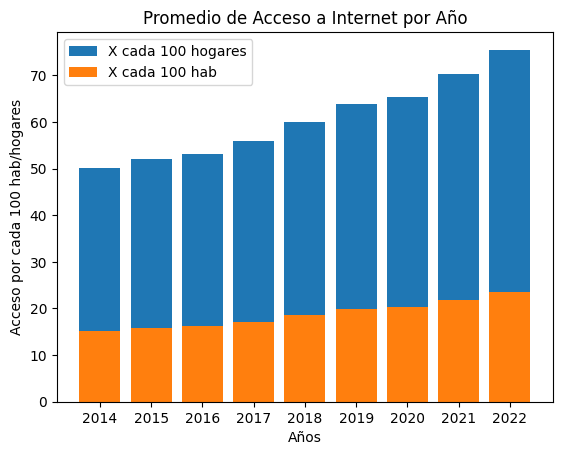

In [15]:
# Hago un dataframe nuevo con los datos que voy a graficar
ndf = df[['Año', 'Accesos por cada 100 hogares', 'Accesos por cada 100 hab']]
ndf = ndf.groupby(['Año']).mean() # Obtengo el promedio del Acceso a intertet
# Creo la gráfica
fig, ax = plt.subplots()
ax.bar(ndf.index, ndf['Accesos por cada 100 hogares'].values)
ax.bar(ndf.index, ndf['Accesos por cada 100 hab'].values)
plt.title('Promedio de Acceso a Internet por Año')
plt.ylabel('Acceso por cada 100 hab/hogares')
plt.xlabel('Años')
plt.legend(['X cada 100 hogares', 'X cada 100 hab'])
plt.show()

- El acceso a internet ha ido aumentando todos los años, sólo en 2019 y 2020 no hubo tanto crecimiento, al igual que en 2015 y 2016.
- El acceso a internet por habitante crece más lentamente que por cada hogar.

Agrego el dataset que tiene datos acerca de acceso a internet por provincia

In [16]:
df = pd.read_csv('Datasets/Internet_Penetracion.csv', sep = ',', header = 0)
df.head()

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,"78,11"
1,2022,3,Capital Federal,"122,28"
2,2022,3,Catamarca,"65,33"
3,2022,3,Chaco,"43,86"
4,2022,3,Chubut,"84,38"


Veo la información acerca del dataset

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Año                           840 non-null    int64 
 1   Trimestre                     840 non-null    int64 
 2   Provincia                     840 non-null    object
 3   Accesos por cada 100 hogares  840 non-null    object
dtypes: int64(2), object(2)
memory usage: 26.4+ KB


- Tiene 840 filas y 4 columnas
- No tiene valores nulos

Paso a tipo float los valores del campo **Accesos por cada 100 hogares**

In [18]:
df['Accesos por cada 100 hogares'] = df['Accesos por cada 100 hogares'].apply(str_tofloat)

Igual que el el dataframe anterior, paso el campo **Año** y el campo **Trimestre** a tipo string

In [19]:
df['Año'] = df['Año'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)

Veo las características de los datos cuantitativos

In [20]:
df.describe()

,Accesos por cada 100 hogares
count,840.000000
mean,49.065750
std,23.151885
min,9.350000
25%,32.107500
50%,45.900000
75%,61.865000
max,124.060000


- En promedio, en cada provincia, solo 49 de cada 100 hogares tienen acceso a internet.
- Hay casos en los que aproximadamente solo 9 de cada 100 hogares tiene acceso a internet.
- Pero también hay casos en los que hay más de 100 accesos a internet.

Busco si hay filas duplicadas

In [21]:
df[df.duplicated()]

,Año,Trimestre,Provincia,Accesos por cada 100 hogares


Exporto el dataset modificado

In [22]:
df.to_csv('NuevosDatasets/Internet_Penetracion_ed.csv', sep = ',', index = False)
df.head(1)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,3,Buenos Aires,78.11


Veo las características de los datos categóricos

In [23]:
df.describe(include = ['O'])

,Año,Trimestre,Provincia
count,840,840,840
unique,9,4,24
top,2021,3,Buenos Aires
freq,96,216,35


- No ha filas duplicadas.
- Hay datos de nueve años, igual que en el dataset anterior.
- Hay datos de las 23 provincias y de Capital Federal.
- Igual que en el dataset anterior, están los 4 trimestres que hay en un año.

Gráfica mostrando el acceso a internet por cada 100 hogares por provincia

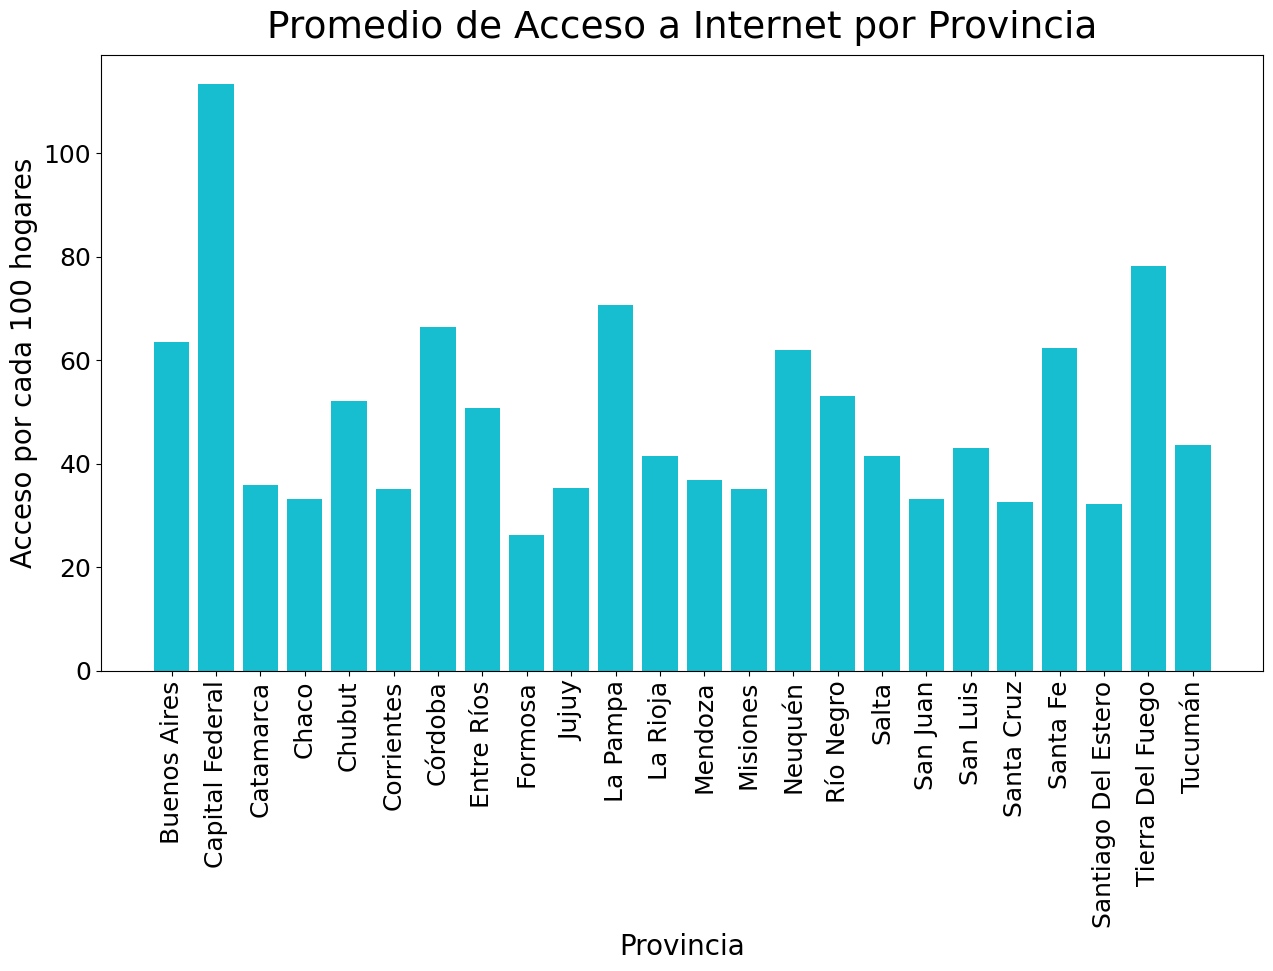

In [24]:
# Hago un dataframe nuevo con los datos que voy a graficar
ndf = df[['Provincia', 'Accesos por cada 100 hogares']]
ndf = ndf.groupby(['Provincia']).mean() # Obtengo el promedio del Acceso a intertet
# Creo la gráfica
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(ndf.index, ndf['Accesos por cada 100 hogares'].values, color = 'tab:cyan')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Promedio de Acceso a Internet por Provincia', fontsize = 27, pad = 12)
plt.ylabel('Acceso por cada 100 hogares', fontsize = 20)
plt.xlabel('Provincia', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.show()

- Capital Federal es donde ha habido más acceso a internet en los últimos años.
- La provincia que ha tenido menos acceso a internet es Formosa.

En la gráfica anterior se ve como ha sido el acceso a internet a lo largo de 9 años, sin embargo con un heatmap como el siguiete se puede observar mejor como ha sido la variación en 9 años en cada provincia

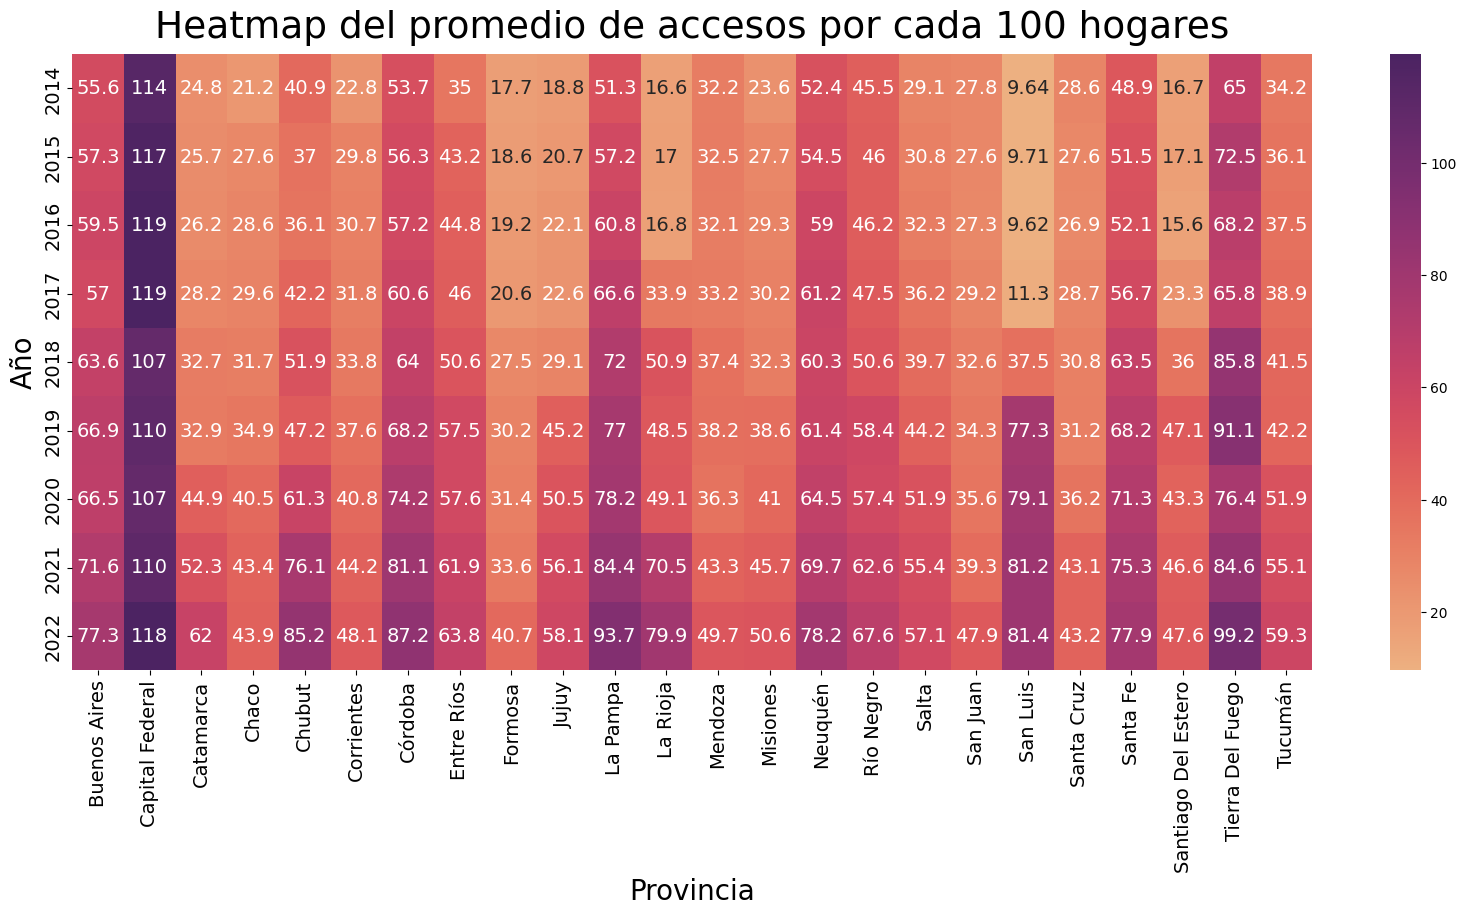

In [25]:
# Acomodo los datos para obtener el Heatmap con los datos promedio de "Accesos por cada 100 hogares"
pivot_df = df.pivot_table(index = 'Año', columns = 'Provincia',
                           values = 'Accesos por cada 100 hogares', aggfunc = np.mean)
plt.figure(figsize = (20, 8))
sns.heatmap(pivot_df, annot = True, annot_kws = {'size': 14}, cmap = 'flare', fmt = '.3g')
plt.title('Heatmap del promedio de accesos por cada 100 hogares', fontsize = 27, pad = 12)
plt.xlabel('Provincia', fontsize = 20)
plt.ylabel('Año', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

- En el heatmap se nota como ha ido creciendo el acceso a internet por cada 100 hogares.
- La porvincia que tuvo la menor cantidad de acceso a internet por cada 100 hogares fue la provincia de San Luis en el año 2016.
- Las provincias que han tenido más de 50 accesos a interntet por cada 100 hogares desde el año 2020 son: Capital Federal, Chubut, Córdoba, Entre Ríos, Jujuy, La Palma, Neuquén, Río Negro, Salta, San Luis, Santa Fe, Tierra del Fuego y Tucumán.

Accedo a los datos alojados en el "csv" que tiene datos acerca del número de conexiones por banda ancha o banda angosta

In [26]:
df = pd.read_csv('Datasets/Internet_BAF.csv', sep = ',', header = 0)
df.head()

,Año,Trimestre,Banda ancha fija,Dial up,Total,Periodo
0,2022,3,11.078.691,12.437,11.091.128,Jul-Sept 2022
1,2022,2,10.946.248,12.436,10.958.684,Abr-Jun 2022
2,2022,1,10.611.390,12.619,10.624.009,Ene-Mar 2022
3,2021,4,10.476.933,12.861,10.489.794,Oct-Dic 2021
4,2021,3,10.075.184,10.357,10.085.541,Jul-Sept 2021


Veo la información del dataframe

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               35 non-null     int64  
 1   Trimestre         35 non-null     int64  
 2   Banda ancha fija  35 non-null     object 
 3   Dial up           35 non-null     float64
 4   Total             35 non-null     object 
 5   Periodo           35 non-null     object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.8+ KB


- El data set cuenta con 6 columnas y 35 filas
- No ha valores nulos

In [28]:
# Realizo una función que quite los puntos de los números y convierta a tipo int los números
def str_toint(cadena):
    numero = cadena.replace('.', '')
    return int(numero)

Modifico los datos del campo **Periodo**

In [29]:
df['Periodo'] = df['Periodo'].str.replace('Ene', 'Jan')
df['Periodo'] = df['Periodo'].str.replace('Abr', 'Apr')
df['Periodo'] = df['Periodo'].str.replace('Sept', 'Sep')
df['Periodo'] = df['Periodo'].str.replace('Dic', 'Dec')

Hago transformaciones en los datos para después crear un nuevo archivo "csv"

In [30]:
df['Banda ancha fija'] = df['Banda ancha fija'].apply(str_toint)
df['Total'] = df['Total'].apply(str_toint)
df['Dial up'] = df['Dial up'] * 1000
df['Dial up'] = df['Dial up'].astype(int)
df['Año'] = df['Año'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)
# Creo dos columnas nuevas a partir de los datos del campo "Periodo"
df['Inicia periodo'] = df['Periodo'].apply(fechainicial)
df['Termina periodo'] = df['Periodo'].apply(fechafinal)
# Elimino el campo periodo
df.drop(columns = 'Periodo', inplace = True)
# Creo un nuevo csv
df.to_csv('NuevosDatasets/Internet_BAF_ed.csv', sep = ',', index = False)
df.head(1)

,Año,Trimestre,Banda ancha fija,Dial up,Total,Inicia periodo,Termina periodo
0,2022,3,11078691,12437,11091128,Jul 2022,Sep 2022


In [31]:
df.describe()

,Banda ancha fija,Dial up,Total
count,3.500000e+01,35.000000,3.500000e+01
mean,8.274417e+06,23383.371429,8.297800e+06
std,1.408774e+06,10087.397193,1.399611e+06
min,6.362108e+06,9991.000000,6.398398e+06
25%,7.024946e+06,12436.500000,7.057455e+06
50%,8.083533e+06,26911.000000,8.110444e+06
75%,9.244537e+06,32508.500000,9.260442e+06
max,1.107869e+07,39324.000000,1.109113e+07


- En promedio más de 8 millones de personas tienen acceso a internet por banda ancha fija, en cambio en promedio, más o menos 23 mil personas aún tienen acceso a internet por Dial up.
- Es evidente que hay más personas con conexión a banda ancha que con Dial up, porque la banda ancha es una tecnología mejor, más actual y más ampliamente usada mundialmente.
- Hubo un periodo en el que el acceso a la banda ancha fue de solo 6 millones de personas
- En cambio también hay un periodo en el que el acceso a la banda ancha es de un poco más de 10 millones de personas.

In [32]:
df.describe(include = ['O'])

,Año,Trimestre,Inicia periodo,Termina periodo
count,35,35,35,35
unique,9,4,35,35
top,2021,3,Jul 2022,Sep 2022
freq,4,9,1,1


- Hay 35 valores distintos en los campos de los periodos, por lo que no hay filas duplicadas.
- Hay información de nueve años y 4 trimestres distintos

Graficas de lineas de accesos a internet por banda ancha fija y Dial Up

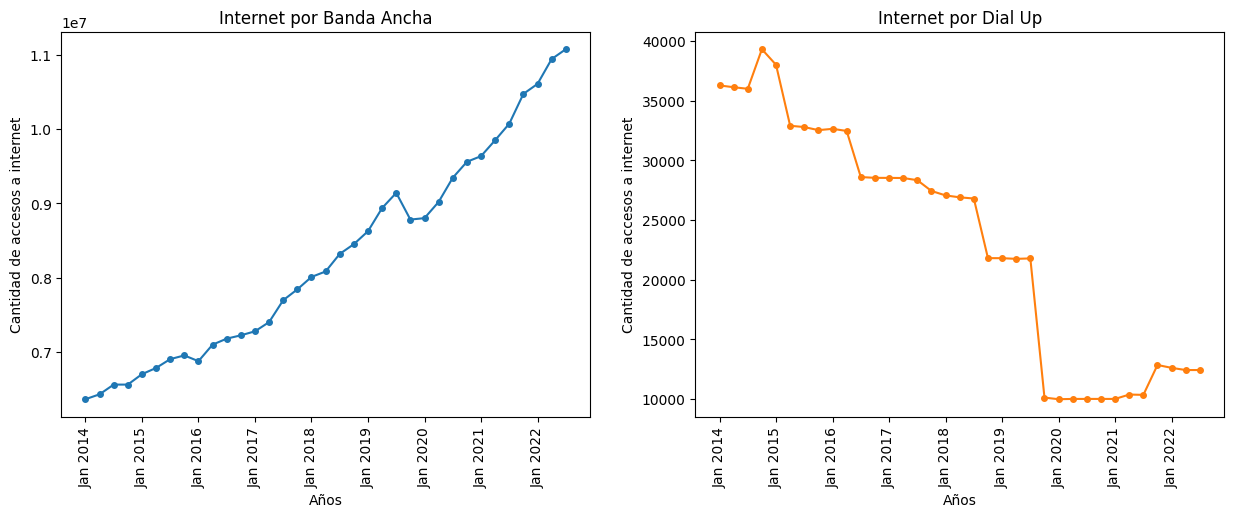

In [33]:
# Hago un dataframe nuevo con los datos que voy a graficar
ndf = df[['Inicia periodo', 'Banda ancha fija', 'Dial up']]
periodo = ndf['Inicia periodo'].values
BandaAncha = ndf['Banda ancha fija'].values
DialUp = ndf['Dial up'].values
fig, ax = plt.subplots(1, 2, figsize = (15, 5))
ax[0].plot(periodo, BandaAncha,  marker = "o", markersize = 4)
ax[0].set(title = 'Internet por Banda Ancha', xlabel = 'Años', ylabel = 'Cantidad de accesos a internet')
# Uso los valores del mes de enero para mostrar en el eje x
ax[0].set(xticks = list(range(2, 38, 4)))
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
ax[0].invert_xaxis()
ax[1].plot(periodo, DialUp,  marker = "o", markersize = 4, color = "tab:orange")
ax[1].set(title = 'Internet por Dial Up', xlabel = 'Años', ylabel = 'Cantidad de accesos a internet')
# Uso los valores del mes de enero para mostrar en el eje x
ax[1].set(xticks = list(range(2, 38, 4)))
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
ax[1].invert_xaxis()
plt.show()

- El acceso a intertnet por banda ancha ha estado creciendo cada año.
- El accesoa a itnernet por Dial up ha estado disminuyendo con los años y es lo que se espera, porque es una tecnología antigua. Aunque solo ha ido disminuyendo hasta el año 2020.
- Desde 2019 al 2020 bajó más de lo normal la conexión por Dial up, y a partir del año 2020, la conexión por Dial up empezó a subir.

Hago el siguiente dataframe con un nuevo dataset que contiene el número de accesos a internet fijo por tipo de tecnología a nivel nacional

In [34]:
df = pd.read_csv('Datasets/Internet_Accesos-por-tecnologia.csv', sep = ',', header = 0)
df.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1.395.277,6.031.970,2.871.541,557.110,235.230,11.091.128,Jul-Sept 2022
1,2022,2,1.468.333,5.979.214,2.723.285,556.243,231.609,10.958.684,Abr-Jun 2022
2,2022,1,1.533.240,6.073.426,2.219.533,545.814,251.996,10.624.009,Ene-Mar 2022
3,2021,4,1.657.615,5.984.240,2.072.236,523.107,252.596,10.489.794,Oct-Dic 2021
4,2021,3,1.950.631,5.826.257,1.566.048,492.415,250.190,10.085.541,Jul-Sept 2021


Veo la información acerca de filas, columas y tipos de datos del dataframe

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Año           35 non-null     int64  
 1   Trimestre     35 non-null     int64  
 2   ADSL          35 non-null     object 
 3   Cablemodem    35 non-null     object 
 4   Fibra óptica  35 non-null     object 
 5   Wireless      35 non-null     float64
 6   Otros         35 non-null     float64
 7   Total         35 non-null     object 
 8   Periodo       35 non-null     object 
dtypes: float64(2), int64(2), object(5)
memory usage: 2.6+ KB


- En total hay 35 filas y 9 columnas.
- No existen valores nulos.

Convierto el campo **Año** y el campo **Trimestre** as string

In [36]:
df['Año'] = df['Año'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)

Quito los puntos en los datos que lo necesitan y los convierto a tipo numérico si es necesario

In [37]:
df['ADSL'] = df['ADSL'].apply(str_toint)
df['Cablemodem'] = df['Cablemodem'].apply(str_toint)
df['Fibra óptica'] = df['Fibra óptica'].apply(str_toint)
df['Total'] = df['Total'].apply(str_toint)
df['Wireless'] = df['Wireless'] * 1000
df['Wireless'] = df['Wireless'].astype(int)
df['Otros'] = df['Otros'] * 1000
df['Otros'] = df['Otros'].astype(int)

Cambio el campo **Periodo** para que sea más fácil manejar los datos de tipo fecha en Power BI

In [38]:
df['Periodo'] = df['Periodo'].str.replace('Ene', 'Jan')
df['Periodo'] = df['Periodo'].str.replace('Abr', 'Apr')
df['Periodo'] = df['Periodo'].str.replace('Sept', 'Sep')
df['Periodo'] = df['Periodo'].str.replace('Dic', 'Dec')
# Creo dos columnas nuevas a partir de los datos del campo "Periodo"
df['Inicia periodo'] = df['Periodo'].apply(fechainicial)
df['Termina periodo'] = df['Periodo'].apply(fechafinal)
# Elimino el campo periodo
df.drop(columns = 'Periodo', inplace = True)

Exporto el "csv" con el dataframe que modifiqué

In [39]:
df.to_csv('NuevosDatasets/Internet_Accesos-por-tecnologia_ed.csv', sep = ',', index = False)
df.head(1)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Inicia periodo,Termina periodo
0,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul 2022,Sep 2022


Veo la descripción estadística de los datos cuantitativos

In [40]:
df.describe()

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,3.040425e+06,4.122601e+06,7.390627e+05,248280.028571,147431.085714,8.297800e+06
std,8.354122e+05,1.225277e+06,7.861772e+05,174354.292929,85868.716764,1.399611e+06
min,1.395277e+06,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2.279711e+06,2.966749e+06,1.679880e+05,85107.500000,62763.500000,7.057455e+06
50%,3.557216e+06,4.038141e+06,2.262850e+05,194267.000000,100554.000000,8.110444e+06
75%,3.723156e+06,5.132233e+06,1.138802e+06,394963.000000,247918.500000,9.260442e+06
max,3.803024e+06,6.073426e+06,2.871541e+06,557110.000000,265328.000000,1.109113e+07


- En Argentina la tecnología más usada es Cablemodem.
- En este dataset y en el anterior, el promedio del total de accesos a internet es el mismo, esto significa que no faltan valores, o no hubo ningún error al generar el dataset.

Veo las características de los datos categóricos

In [41]:
df.describe(include = ['O'])

,Año,Trimestre,Inicia periodo,Termina periodo
count,35,35,35,35
unique,9,4,35,35
top,2021,3,Jul 2022,Sep 2022
freq,4,9,1,1


- No hay filas duplicadas, esto lo noto porque en los campos de **Inicia periodo** y **Termina periodo** los valores únicos son igual a la cantidad de filas
- Al igual que en los anteriores datasets hay datos de 9 años y 4 trimestres por cada año.

In [42]:
# Hago un dataframe nuevo con los datos que voy a graficar
ndf = df[['Inicia periodo', 'ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]
periodo = ndf['Inicia periodo'].values
Adsl = ndf['ADSL'].values
Cablemodem = ndf['Cablemodem'].values
FibraOptica = ndf['Fibra óptica'].values
Wireless = ndf['Wireless'].values
Others = ndf['Otros'].values

Gráfica que muestra como se han estado usando las tecnologías de acceso a interntet a lo largo del tiempo.

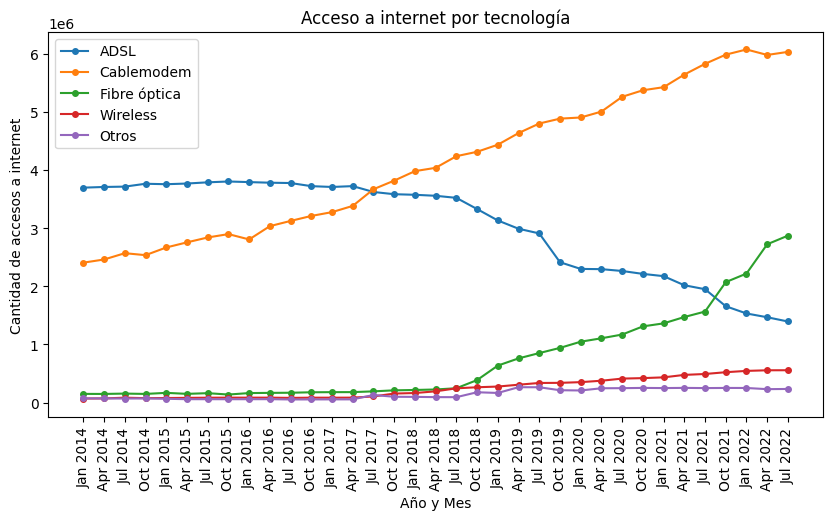

In [43]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(periodo, Adsl,  marker = "o", markersize = 4)
ax.plot(periodo, Cablemodem, marker = "o", markersize = 4)
ax.plot(periodo, FibraOptica, marker = "o", markersize = 4)
ax.plot(periodo, Wireless, marker = "o", markersize = 4)
ax.plot(periodo, Others, marker = "o", markersize = 4)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
ax.invert_xaxis()
plt.legend(['ADSL', 'Cablemodem', 'Fibre óptica', 'Wireless', 'Otros'])
plt.title('Acceso a internet por tecnología')
plt.xlabel('Año y Mes')
plt.ylabel('Cantidad de accesos a internet')
plt.show()

- La tecnología que menos se usa para acceder a internet es Wireless y de otros tipos.
- La más usada actualmente es Cablemodem
- Inicialmente en el año 2014, la tecnología más usada era ADSL, pero ahora a estado quedando en desuso.
- La fibra óptica es un tecnología que no se usaba tanto antes por ser una tecnología más o menos nueva, pero ahora poco a poco se va usando más. A partir del 2022, empezó a ser más usada que el ADSL. Siendo la segunda tecnología más usada en Argentina. 

Hago un mapa de corrrelación para ver que tan relacionado está el uso de unas tecnologías o de otras

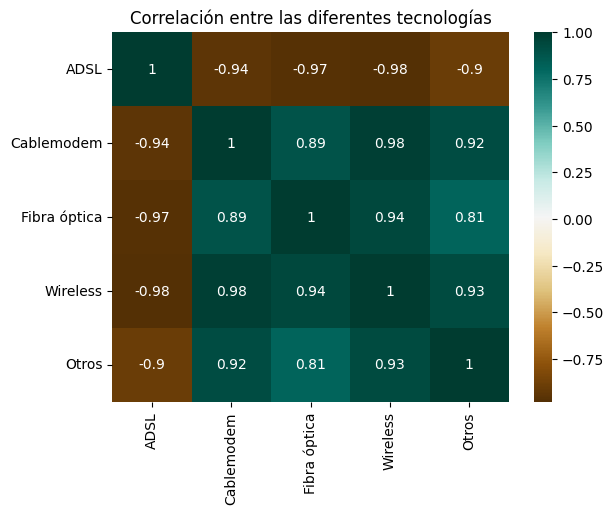

In [44]:
ndf = df[['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']]
sns.heatmap(ndf.corr(), annot=True, cmap='BrBG')
plt.title('Correlación entre las diferentes tecnologías')
plt.show()

- La tecnología ADSL está inversamente relacionada con las otras tecnologías, y esto se nota también en el gráfico de lineas anterior, mientras ésta tecnología se ha estado dejando de unsar las otras se empiezan a usar más.
- En el mapa anterior marca que hay una fuerte relación entre los accesos a internet con Cablemodem y Wireless.Esto quizá se deba a que las tecnologías Wireless tienen también la opción de conexión con cable.

Veo la información del dataset que tiene la distribución de los accesos nacionales a internet fijo por velocidad de bajada

In [45]:
df = pd.read_excel('Datasets/Internet_Accesos-por-velocidad.xlsx')
df.head()

,Año,Trimestre,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
0,2022,3,33013,96727,1161370,1151906,823505,479822,6995750,349035,11091128
1,2022,2,33667,99498,1193090,1197030,856562,485321,6741922,351594,10958684
2,2022,1,34890,104840,1263273,1209148,967508,509830,6336187,198333,10624009
3,2021,4,41262,28521,1413208,1245333,976539,558358,6032322,194251,10489794
4,2021,3,40174,41437,2550229,1095772,710122,536364,4948174,163269,10085541


Veo la información acerca de los tipos de datos, numero de columnas y filas

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      35 non-null     int64
 1   Trimestre                35 non-null     int64
 2   Hasta 512 kbps           35 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  35 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    35 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   35 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  35 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  35 non-null     int64
 8   Más de 30 Mbps           35 non-null     int64
 9   OTROS                    35 non-null     int64
 10  Total                    35 non-null     int64
dtypes: int64(11)
memory usage: 3.1 KB


- Tiene un total de 35 filas y 11 columnas
- No hay valores nulos

En este dataframe solo será necesario modificar los campos de **Año** y **Trimestre** a tipo string

In [47]:
df['Año'] = df['Año'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)

Veo las características de los datos cuantitativos

In [48]:
df.describe()

,Hasta 512 kbps,Entre 512 Kbps y 1 Mbps,Entre 1 Mbps y 6 Mbps,Entre 6 Mbps y 10 Mbps,Entre 10 Mbps y 20 Mbps,Entre 20 Mbps y 30 Mbps,Más de 30 Mbps,OTROS,Total
count,35.000000,35.000000,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,3.500000e+01,35.00000,3.500000e+01
mean,50074.228571,243428.314286,3.623279e+06,8.975174e+05,9.190145e+05,5.037122e+05,1.900309e+06,118396.00000,8.255731e+06
std,53083.966405,199321.891143,1.292407e+06,2.462911e+05,4.881587e+05,4.717638e+05,2.357935e+06,112930.69412,1.442421e+06
min,5675.000000,28521.000000,1.161370e+06,2.891820e+05,1.011270e+05,3.450000e+02,1.159500e+04,0.00000,6.272846e+06
25%,26397.000000,68384.500000,2.643902e+06,7.799985e+05,6.674615e+05,5.082050e+04,2.620000e+04,0.00000,7.029346e+06
50%,39487.000000,217997.000000,3.428759e+06,9.769560e+05,8.144700e+05,5.098300e+05,4.443910e+05,155145.00000,8.110444e+06
75%,41210.000000,394515.500000,4.996999e+06,1.057958e+06,1.149810e+06,6.396735e+05,3.882480e+06,196292.00000,9.260442e+06
max,241713.000000,687619.000000,5.153437e+06,1.245333e+06,2.068087e+06,1.688748e+06,6.995750e+06,351594.00000,1.109113e+07


- En promedio la mayoría de los accesos a internet han sido con un rango de velocidad de bajada entre 1Mbps y 6Mbps.
- Han habido muy pocas personas que se conectan a internet con un servició menor a 512 kbps.

Veo la información acerca de los datos categóricos

In [49]:
df.describe(include = ['O'])

,Año,Trimestre
count,35,35
unique,9,4
top,2021,3
freq,4,9


- Los datos en este dataset son de 9 años distintos y de los 4 trimestres que hay en cada año.

Grafico el promedio de los accesos que hay accomodados por velocidad de bajada

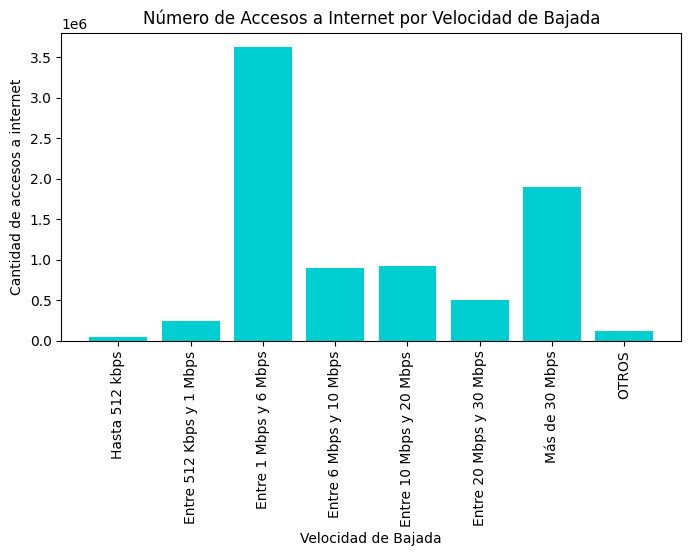

In [50]:
# Hago un dataframe nuevo con los datos que voy a graficar
ndf = df[['Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
          'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS']]
fig, ax = plt.subplots(figsize = (8, 4))
ax.bar(ndf.columns, ndf.mean().values, color = "darkturquoise")
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Número de Accesos a Internet por Velocidad de Bajada')
plt.ylabel('Cantidad de accesos a internet')
plt.xlabel('Velocidad de Bajada')
plt.show()

- En la gráfica se observa mejor que la mayoría de las conexiones a internet han sido con una velocidad de bajada entre 1Mbps y 6 Mbps.
- El rango de velocidad de bajada que ocupa el segundo lugar en donde han existido más conexiones es en accesos a internet con más de 30 Mbps de velocidad de bajada.

Hago un heatmap con el promedio de accesos a internet por velocidad de bajada

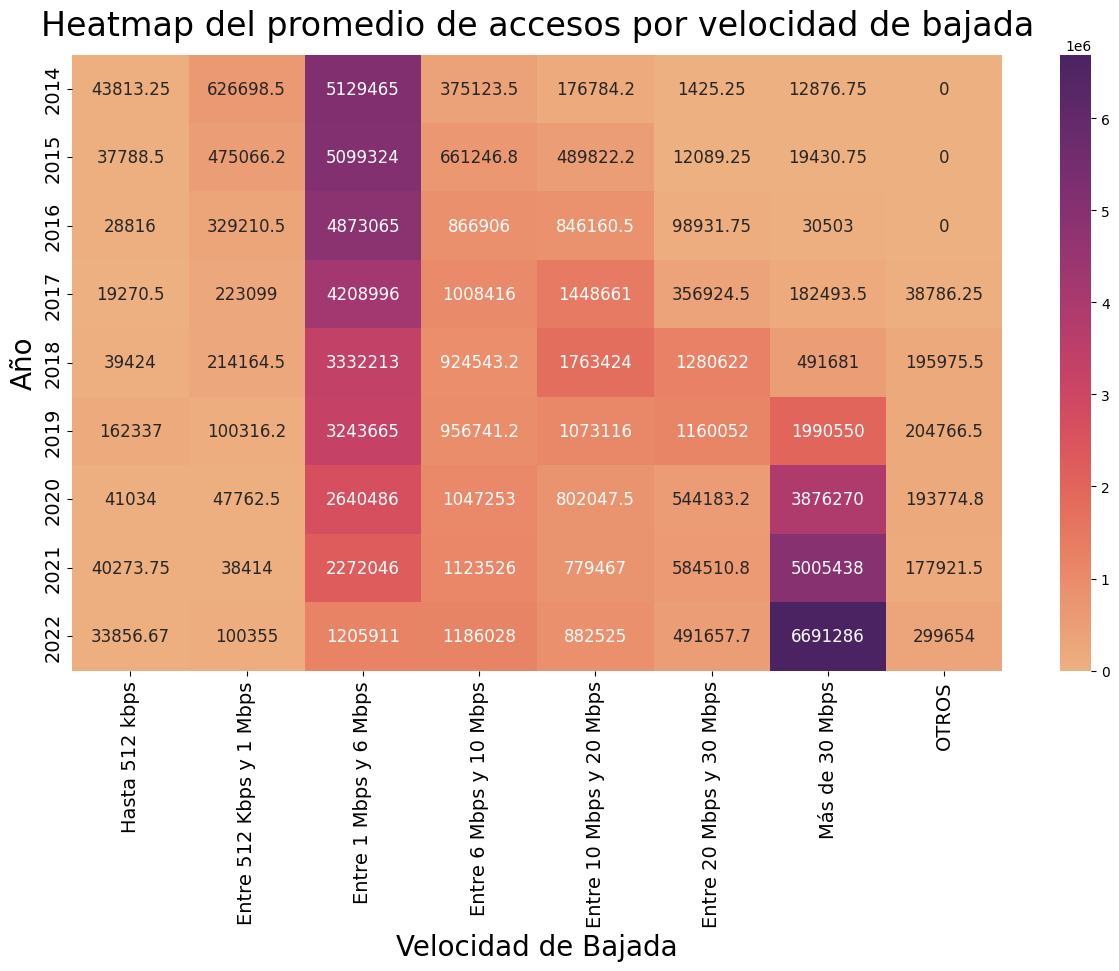

In [51]:
# Hago un dataframe nuevo con los datos que voy a graficar
ndf = df[['Año', 'Hasta 512 kbps', 'Entre 512 Kbps y 1 Mbps', 'Entre 1 Mbps y 6 Mbps', 'Entre 6 Mbps y 10 Mbps',
          'Entre 10 Mbps y 20 Mbps', 'Entre 20 Mbps y 30 Mbps', 'Más de 30 Mbps', 'OTROS']]
ndf = ndf.set_index('Año') # Pongo la columna "Año" como índice
ndf = ndf.groupby('Año').mean() # Agrupo la información por año y saco el promedio
plt.figure(figsize = (15, 8))
sns.heatmap(ndf, annot = True, annot_kws = {'size': 12}, cmap = 'flare', fmt = '.7g')
plt.title('Heatmap del promedio de accesos por velocidad de bajada', fontsize = 24, pad = 14)
plt.xlabel('Velocidad de Bajada', fontsize = 20)
plt.ylabel('Año', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

- Desde los años 2014 hasta 2016 sólo habían accesos a internet con velocidad entre 512 kbps y más de 30 Mbps, pero en años posteriores hay otros rangos de velocidad que no se especifican en el dataframe.
- Desde el año 2014 el rango de velocidad de bajada en la mayoría de los dispositivos conectados a internet era entre 1 Mbps y 6 Mbps, pero con el tiempo han ido mejorando los rangos de velocidad y actualmente la mayoría de  los dispositivos se conectan a internet con una velocidad mayor a 30 Mbps.

Leo la información del último dataset

In [52]:
df = pd.read_csv('Datasets/Internet_Accesos-por-velocidad.csv', sep = ',', header = 0)
df.head()

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
0,2022,3,Buenos Aires,29.985,27.709,290.315,297.915,267.044,124.190,3.618.689,65.821,4.721.668
1,2022,3,Capital Federal,517.000,5.742,34.371,67.829,51.946,28.692,1.253.105,105.477,1.547.679
2,2022,3,Catamarca,71.000,384.000,3.107,5.389,5.099,3.737,50.298,2.208,70.293
3,2022,3,Chaco,461.000,987.000,16.782,18.938,8.049,15.828,79.390,3.711,144.146
4,2022,3,Chubut,109.000,1.444,45.707,30.940,34.682,15.309,17.563,20.024,165.778


Reviso la información acerca del número de filas, columnas y el tipo de los datos

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Año                  840 non-null    int64  
 1   Trimestre            840 non-null    int64  
 2   Provincia            840 non-null    object 
 3   HASTA 512 kbps       840 non-null    float64
 4   + 512 Kbps - 1 Mbps  840 non-null    float64
 5   + 1 Mbps - 6 Mbps    840 non-null    object 
 6   + 6 Mbps - 10 Mbps   840 non-null    float64
 7   + 10 Mbps - 20 Mbps  840 non-null    float64
 8   + 20 Mbps - 30 Mbps  840 non-null    float64
 9   + 30 Mbps            840 non-null    object 
 10  OTROS                834 non-null    float64
 11  Total                840 non-null    object 
dtypes: float64(6), int64(2), object(4)
memory usage: 78.9+ KB


- El dataset tiene en total 840 filas y 12 columnas
- En el campo "OTROS", hay 6 valores nulos

In [54]:
# Cambiaré por cero los valores nulos, ya que significa que no hay información acercad de otras velocidades
df = df.fillna(0)

Convierto el campo "Año" y "Trimestre" en tipo string.
Quito los puntos de los valores numéricos y los paso a tipo entero, de igual manera con los valores numéricos de tipo float que en realidad son valores enteros.

In [55]:
df['Año'] = df['Año'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)
df['+ 1 Mbps - 6 Mbps'] = df['+ 1 Mbps - 6 Mbps'].apply(str_toint)
df['+ 30 Mbps'] = df['+ 30 Mbps'].apply(str_toint)
df['Total'] = df['Total'].apply(str_toint)
df['HASTA 512 kbps'] = df['HASTA 512 kbps'] * 1000
df['HASTA 512 kbps'] = df['HASTA 512 kbps'].astype(int)
df['+ 512 Kbps - 1 Mbps'] = df['+ 512 Kbps - 1 Mbps'] * 1000
df['+ 512 Kbps - 1 Mbps'] = df['+ 512 Kbps - 1 Mbps'].astype(int)
df['+ 6 Mbps - 10 Mbps'] = df['+ 6 Mbps - 10 Mbps'] * 1000
df['+ 6 Mbps - 10 Mbps'] = df['+ 6 Mbps - 10 Mbps'].astype(int)
df['+ 10 Mbps - 20 Mbps'] = df['+ 10 Mbps - 20 Mbps'] * 1000
df['+ 10 Mbps - 20 Mbps'] = df['+ 10 Mbps - 20 Mbps'].astype(int)
df['+ 20 Mbps - 30 Mbps'] = df['+ 20 Mbps - 30 Mbps'] * 1000
df['+ 20 Mbps - 30 Mbps'] = df['+ 20 Mbps - 30 Mbps'].astype(int)
df['OTROS'] = df['OTROS'] * 1000
df['OTROS'] = df['OTROS'].astype(int)

Veo la información estadística de los datos numéricos

In [56]:
df.describe()

,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
count,840.000000,840.000000,8.400000e+02,840.000000,840.000000,840.000000,8.400000e+02,840.000000,8.400000e+02
mean,126009.994048,101790.388095,1.509700e+05,71417.261905,79988.622619,100758.147619,7.917956e+04,32701.797619,3.439888e+05
std,187578.608912,207396.127819,3.481538e+05,140324.224165,170586.595341,208683.471459,3.426234e+05,128506.010947,7.373366e+05
min,1006.000000,0.000000,2.842000e+03,0.000000,0.000000,0.000000,0.000000e+00,-1945.000000,1.240600e+04
25%,10000.000000,3362.500000,2.853925e+04,5357.250000,4872.000000,2018.000000,7.000000e+00,0.000000,5.232825e+04
50%,50000.000000,8788.000000,4.883450e+04,20157.000000,14965.500000,11251.500000,8.825000e+02,0.000000,1.043330e+05
75%,134000.000000,84340.500000,8.689750e+04,62225.500000,55093.000000,64286.000000,1.966075e+04,7376.250000,1.775798e+05
max,998000.000000,999000.000000,2.299705e+06,917000.000000,978000.000000,997000.000000,3.618689e+06,923000.000000,4.721668e+06


- En varios rangos de velocidades hay valores que son igual a cero, esto significa que no existen accesos a en esa velocidad.
- Al igual que en el dataframe pasado, la mayoría de los accesos a internet han sido en un rango de 1 Mps a 6 Mbps.

En el campo **OTROS** veo que hay uno o más valores negativos, lo cual es algo extraño, es por esto que verificaré estos datos

In [57]:
df[df['OTROS'] < 0]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total
155,2021,1,La Rioja,18000,1000,36749,5968,4604,215000,5074,-1000,52628
163,2021,1,Santa Cruz,50000,0,30655,8334,6987,1337,647,-1945,46065


In [58]:
df['Total'] = df['HASTA 512 kbps'] + df['+ 512 Kbps - 1 Mbps'] + df['+ 1 Mbps - 6 Mbps'] + df['+ 6 Mbps - 10 Mbps'] + df['+ 10 Mbps - 20 Mbps'] + df['+ 20 Mbps - 30 Mbps'] + df['+ 30 Mbps'] + df['OTROS']

In [59]:
# Asignaré un valor NaN en estos valores y exportaré el nuevo dataframe
df['OTROS'] = df['OTROS'].replace(-1000, np.nan)
df['OTROS'] = df['OTROS'].replace(-1945, np.nan)
df.to_csv('NuevosDatasets/Internet_Accesos-por-velocidad-provincia_ed.csv', sep = ',', index = False)

Veo información acerca de los datos categóricos

In [61]:
df.describe(include = ['O'])

,Año,Trimestre,Provincia
count,840,840,840
unique,9,4,24
top,2021,3,Buenos Aires
freq,96,216,35


- Hay datos de las 23 provicias y de Capital Federal.
- Existen datos de 9 años y de los 4 trimestres que tiene cada año.

In [62]:
# Veré si hay filas duplicadas
df[df.duplicated()]

,Año,Trimestre,Provincia,HASTA 512 kbps,+ 512 Kbps - 1 Mbps,+ 1 Mbps - 6 Mbps,+ 6 Mbps - 10 Mbps,+ 10 Mbps - 20 Mbps,+ 20 Mbps - 30 Mbps,+ 30 Mbps,OTROS,Total


Hago un heatmap con el promedio de accesos por velocidad de bajada por provincia

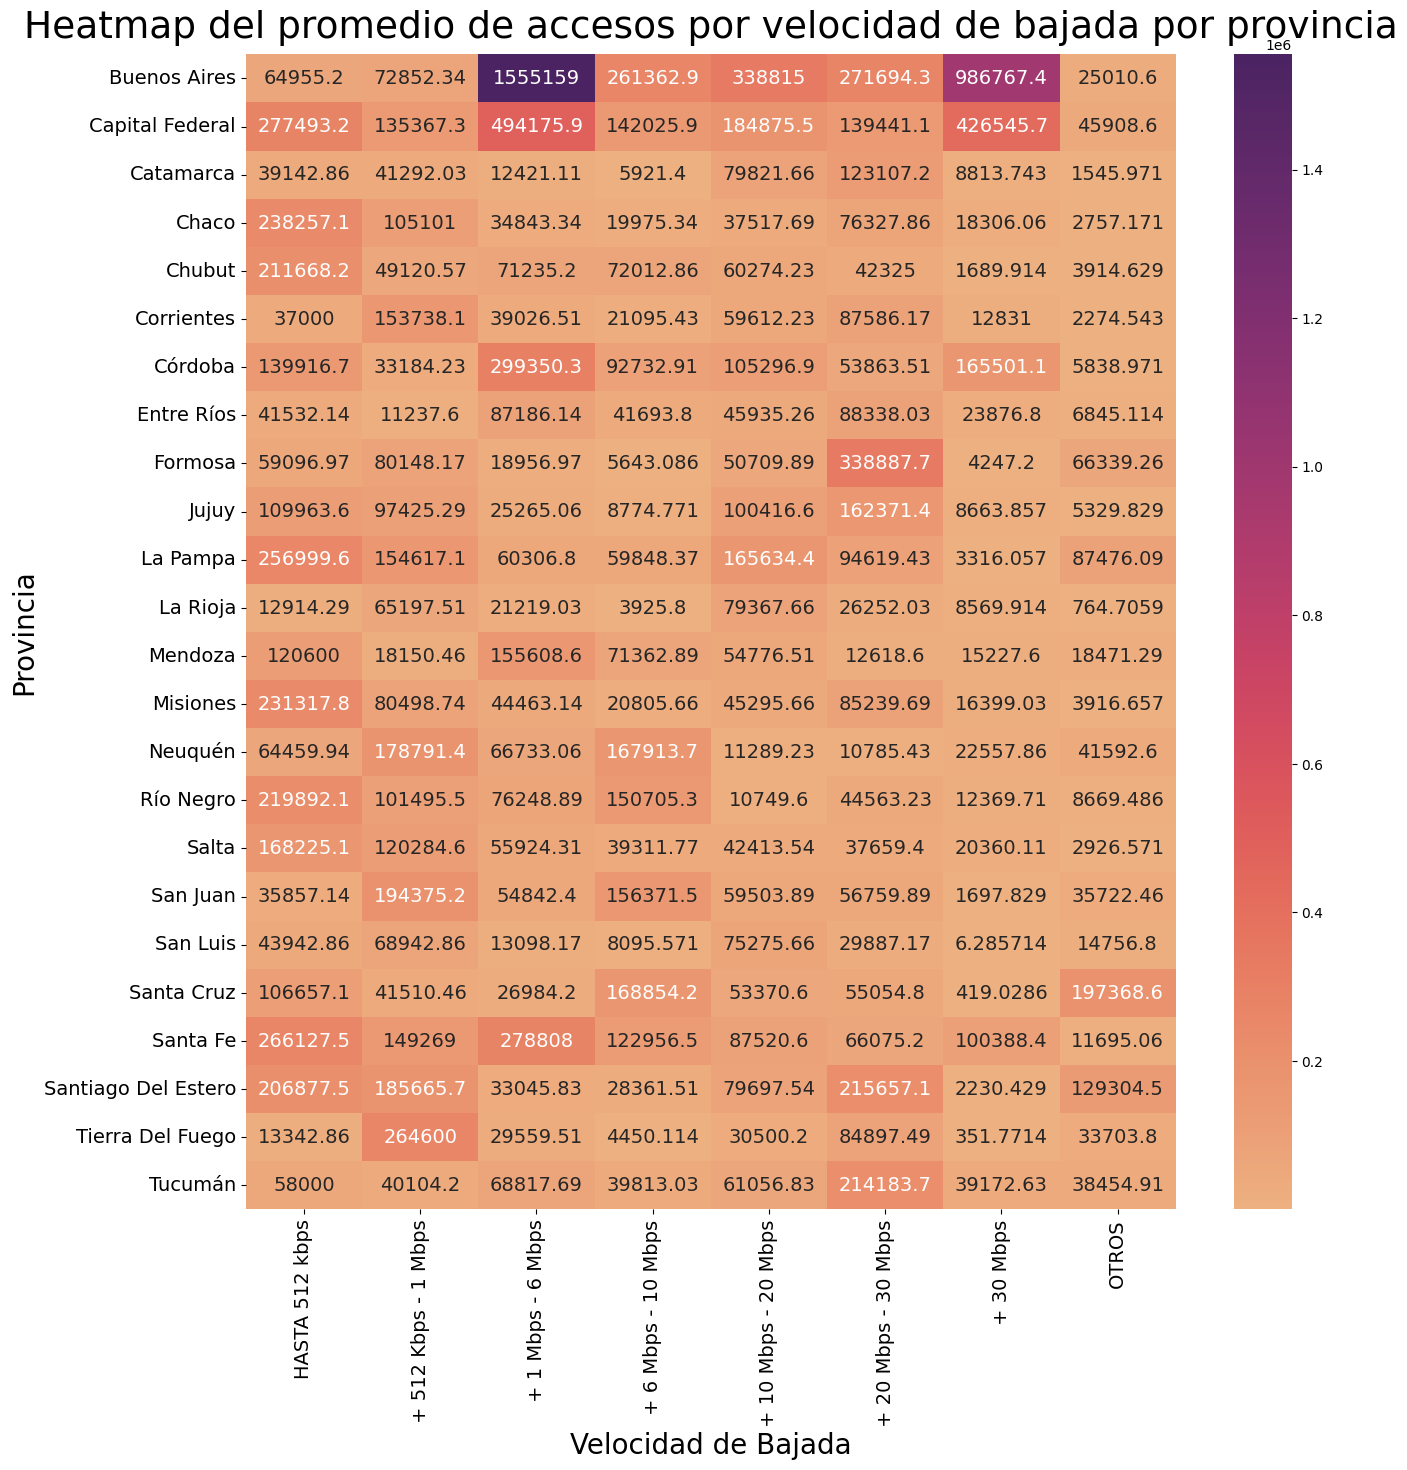

In [63]:
# Hago un dataframe nuevo con los datos que voy a graficar
ndf = df[['Provincia', 'HASTA 512 kbps', '+ 512 Kbps - 1 Mbps', '+ 1 Mbps - 6 Mbps',	'+ 6 Mbps - 10 Mbps', 
         '+ 10 Mbps - 20 Mbps',	'+ 20 Mbps - 30 Mbps', '+ 30 Mbps', 'OTROS']]
ndf = ndf.groupby(['Provincia']).mean()
plt.figure(figsize = (15, 15))
sns.heatmap(ndf, annot = True, annot_kws = {'size': 14}, cmap = 'flare', fmt = '.7g')
plt.title('Heatmap del promedio de accesos por velocidad de bajada por provincia', fontsize = 27, pad = 12)
plt.xlabel('Velocidad de Bajada', fontsize = 20)
plt.ylabel('Provincia', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

- En promedio la cantidad de accesos a internet por velocidad de bajada en todas las provincias es muy parecida.
- En Buenos Aires y en Capital Federal en promedio la mayoría de accesos a internet ha estado en el rango de velocidades de 1 Mbps a 6 Mbps y más de 30 Mbps.

Debido a que muchos servicios de internet se ofrecen con paquetes de telefonía inculidos, analizaré el sigueiente "csv" que tiene información acerca de los accesos al servicio de telefonía por provincia.

In [64]:
df = pd.read_csv('Datasets/telefonia_fija.csv', sep = ',', header = 0)
df.head()

,Año,Trimestre,Provincia,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
0,2014,1,Buenos Aires,26.72,85.26
1,2014,1,Capital Federal,52.66,128.57
2,2014,1,Catamarca,10.03,39.45
3,2014,1,Chaco,9.09,34.02
4,2014,1,Chubut,17.66,57.59


Veo la información acerca de las filas, columnas y tipos de dato

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 5 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Año                                          840 non-null    int64  
 1   Trimestre                                    840 non-null    int64  
 2   Provincia                                    840 non-null    object 
 3   Accesos telefonía fija por cada 100 hab      840 non-null    float64
 4   Accesos telefonía fija por cada 100 hogares  840 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 32.9+ KB


- Hay un total de 840 columnas y 5 columnas.
- No hay valores nulos.

Convierto los campos **Año** y **Trimestre** en tipo string

In [66]:
df['Año'] = df['Año'].astype(str)
df['Trimestre'] = df['Trimestre'].astype(str)

En el caso de los campos **Accesos telefonía fija por cada 100 hab** y **Accesos telefonía fija por cada 100 hogares** los valores que tienen punto no necesitan ser modificados, porque representan el porcentaje que representa la cantidad de accesos a telefonía

Veo la información estadística de los datos cuantitativos

In [67]:
df.describe()

,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares
count,840.000000,840.000000
mean,14.343929,47.660583
std,9.272629,22.105954
min,4.550000,17.460000
25%,8.135000,31.102500
50%,11.300000,41.060000
75%,18.257500,59.265000
max,57.860000,138.280000


- En promedio el 47.6% de los hogares tiene acceso a telefonía.
- El 14.34% de los habitantes tiene accesos a telefonía en promedio.
- Hay una o varias localidades en donde el 4.5% de los habitantes tienen acceso a la telefonía.
- En una o varias localidades existen dos o más hogares con varias lineas telefónicas o varios accesos a la telefonía, porque el máximo en el dataset es 138 accesos a telefonía por cada 100 horares.

Busco filas duplicadas

In [68]:
df[df.duplicated()]

,Año,Trimestre,Provincia,Accesos telefonía fija por cada 100 hab,Accesos telefonía fija por cada 100 hogares


Veo las características de los datos categóricos

In [69]:
df.describe(include = ['O'])

,Año,Trimestre,Provincia
count,840,840,840
unique,9,4,24
top,2014,1,Buenos Aires
freq,96,216,35


- Hay datos de 9 años y los 4 trimestres que tiene cada año.
- Hay datos de las 23 provincias y de Capital Federal.

Grafico el promedio de acceso a la telefonía por provincia, por cada 100 hogares y por cada 100 habitantes

In [70]:
ndf = df[['Provincia', 'Accesos telefonía fija por cada 100 hab', 'Accesos telefonía fija por cada 100 hogares']]
ndf = ndf.groupby(['Provincia']).mean()

Grafico el promedio de accesos a telefonía por cada 100 habitantes y por cada 100 hogares

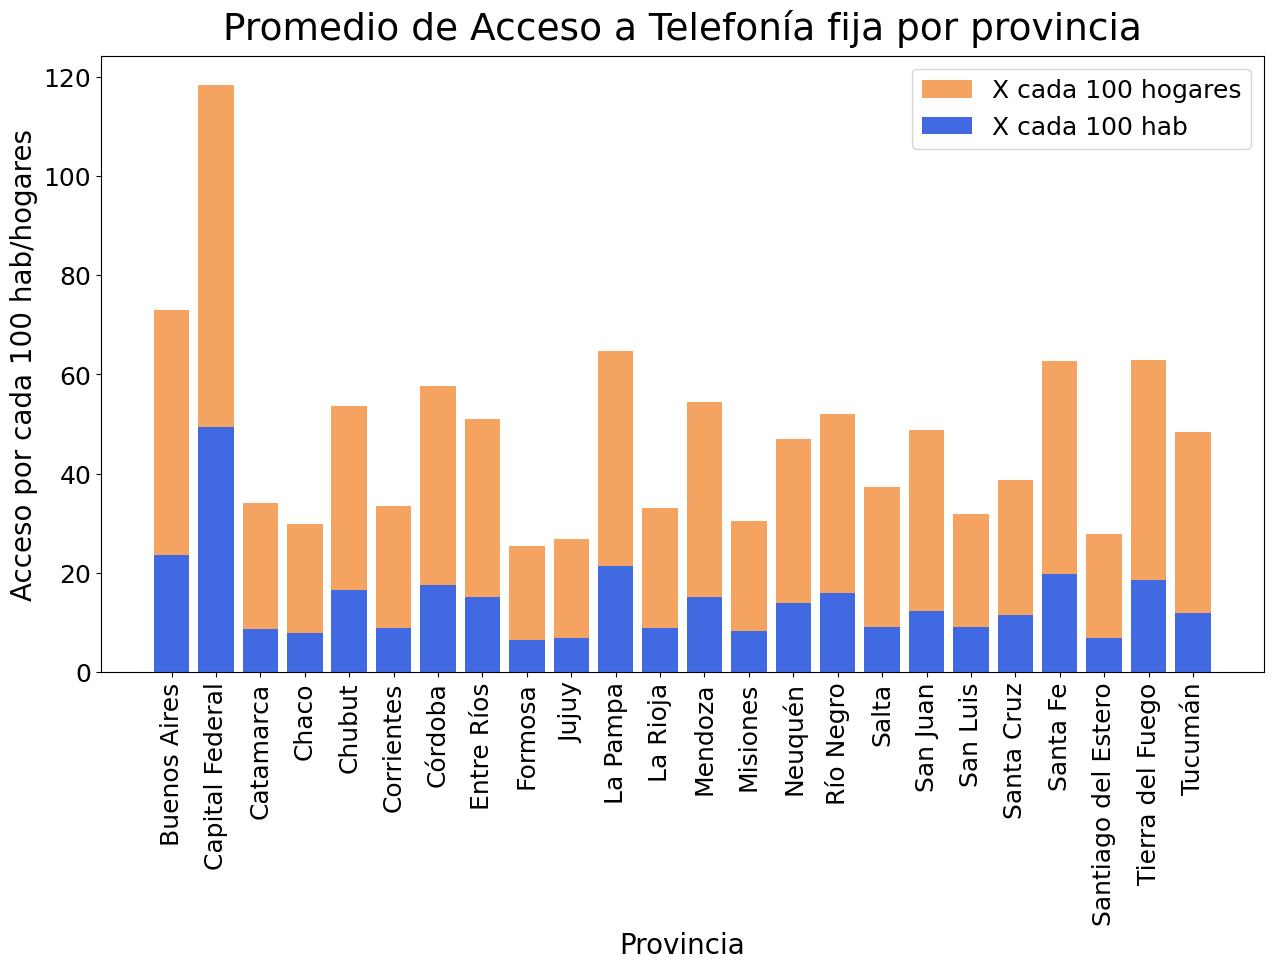

In [71]:
# Hago un dataframe nuevo con los datos que voy a graficar
ndf = df[['Provincia', 'Accesos telefonía fija por cada 100 hab', 'Accesos telefonía fija por cada 100 hogares']]
ndf = ndf.groupby(['Provincia']).mean()
# Creo la gráfica
fig, ax = plt.subplots(figsize = (15, 8))
ax.bar(ndf.index, ndf['Accesos telefonía fija por cada 100 hogares'].values, color = 'sandybrown')
ax.bar(ndf.index, ndf['Accesos telefonía fija por cada 100 hab'].values, color = 'royalblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Promedio de Acceso a Telefonía fija por provincia', fontsize = 27, pad = 12)
plt.ylabel('Acceso por cada 100 hab/hogares', fontsize = 20)
plt.xlabel('Provincia', fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.legend(['X cada 100 hogares', 'X cada 100 hab'], fontsize = 18)
plt.show()

- El acceso a la telefonía por habitantes ha sido menor que el acceso a la telefonía por hogar.
- Capital Federal ha sido el lugar donde hay mayor acceso a telefonía, tanto por hogar, como por habitante.
- El segundo lugar con mayor acceso a la telefonía, en promedio, ha sido la provincia de Buenos Aires. 

Hago un heatmap para observar como ha ido cambiando el acceso a la telefonía por cada 100 hogares por provincia a lo largo de 9 años. No lo haré por cada 100 habitantes porque es más o menos proporcional.

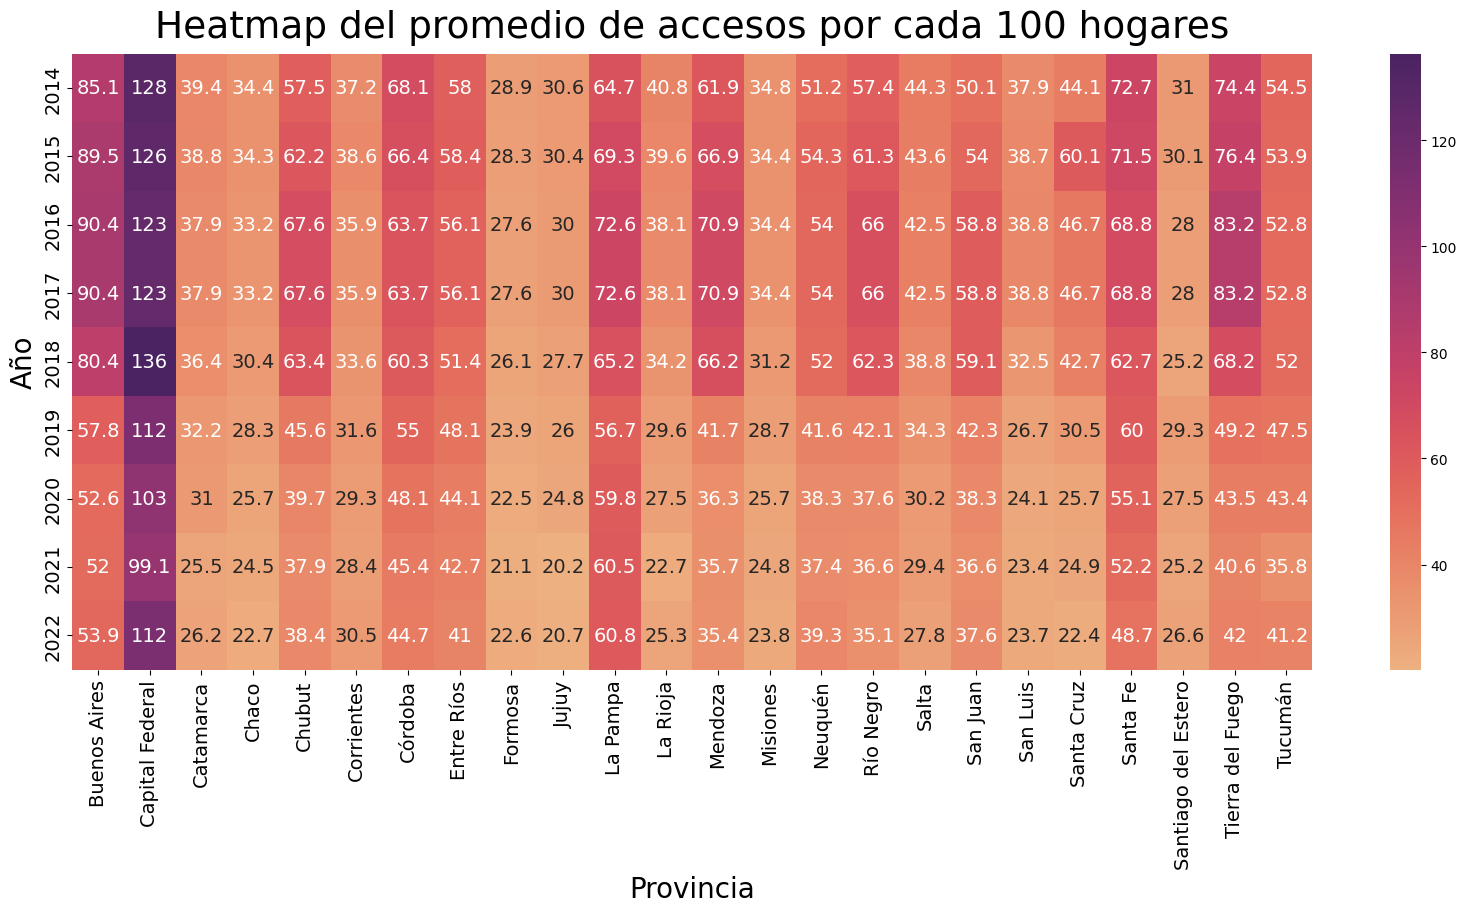

In [72]:
# Acomodo los datos para obtener el Heatmap con los datos promedio de "Accesos por cada 100 hogares"
pivot_df = df.pivot_table(index = 'Año', columns = 'Provincia',
                           values = 'Accesos telefonía fija por cada 100 hogares', aggfunc = np.mean)
plt.figure(figsize = (20, 8))
sns.heatmap(pivot_df, annot = True, annot_kws = {'size': 14}, cmap = 'flare', fmt = '.3g')
plt.title('Heatmap del promedio de accesos por cada 100 hogares', fontsize = 27, pad = 12)
plt.xlabel('Provincia', fontsize = 20)
plt.ylabel('Año', fontsize = 20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

- Como se vio en la gráfica anterior, Capital Federal y Buenos Aires son los lugares donde ha habido mayor acceso a la telefonía.
- La provincia que tiene el tercer lugar con mayor acceso a la telefonía es La Pampa.
- Desde el año 2014 hasta el año 2018, en Tierra del Fuego hubo mejor telefonía que actualmente. En la gráfica se observa que después del 2018, el acceso a la telefonía disminuyó.

### Conclusiones

- Los mejores rangos de velocidades han sido en Capital Federal y Buenos Aires. inicialmente había un rango de velocidades entre 1 Mbps y 6 Mbps, pero actualmente ha subido a velocidades arriba de los 30 Mbps.
- En telefonía también estás dos localidades son en donda han habido y hay más accesos a este servicio.
- A diferencia del servicio de telefonía, en el servicio de internet el segundo lugar con mayor acceso a internet es en Tierra del Fuego, mientras el primer lugar lo sigue ocupando Capital Federal.
- En Argentina las tecnologías más usadas para acceder a internet son por Cablemodem y por fibra óptica.
- El acceso por banda ancha ha estado creciendo y el acceso mediante Dial Up ha estado quedando obsoleto.
- En promedio el acceso ha internet ha ido creciendo con los años.